# Introduction to Social Network Analysis

[Alex Hanna](http://alex-hanna.com), University of Toronto/Google

This is an introduction to social network analysis in R. This introduction aims to accomplish several objectives:

- Motivate the use of social network analysis
- Introduce the theoretical basis of network analysis
- Discuss the potential data sources for network analysis
- Define network terminology and types of networks
- Understand how to import network data into R
- Introduce the R network ecology

### What is Social Network Analysis?

Social network analysis (SNA, also called network analysis, and the related fields of network science and graph theory) is a body of methods used to study the relationship between entities. Entities can be individuals, organizations, Twitter users, countries, or a mix of any of the above. Network analysis distinguishes itself from other types of analysis because the focus is on the relationship between entities rather than focusing solely on the properties of the entity itself.

### Motivation

Typically, we want to use network analysis if we have a sense that the relationships or transactions between actors/entities are the most critical part of the story. If you have a sense that the interlocking connection between entities is more important than their individual attributes, or if networked connections between entities forces an endogeneity problem which cannot be resolved by more conventional quantitative regression techniques, then network analysis may be a good approach for you.

#### Two examples

Although network analysis as is presented today is sometimes synonymous with computational social science or "big data" methods, network analysis has a long history within sociology and political science. Some of the more innovative uses of network analysis focus on uses that work with [archival and historical data](http://www.themacroscope.org/?page_id=308). 

<img src="img/padgett_ansell.png" alt="Padgett and Ansell 1994" width="450px">

In a classic article, [Padgett and Ansell](https://www.jstor.org/stable/2781822) discuss the rise of the Medici family in 14th-century Florence, Italy. While many families in Florence were attempting to accumulate power and influence within this Renaissance state, the Medici family was able to do so in such a way that outpaced all others. Padgett and Ansell illustrate how they were able to do this using network methods. They used a method called blockmodeling to simplify multiple network relationships and positions to get at an underlying network structure. Padgett and Ansell found that the Medicis were able to consolidate power by positioning themselves as a critical broker in marriage and economic (trade, partnership, and real estate) networks within the larger group of elite Florentine families. 

This is one of my favorite examples because it illustrates a highly complicated network based on data which are over six centuries old. The **actor or entity** here is the elite family. Second, there is not a single type of relationship in this network -- this is a **multiplex** network, meaning there are multiple types of relationships which exist between entities. Relationships are both **undirected** and **directed**, which means they are not all mutual. More on that below. Furthermore, what this means is that the **medium** of what travels across the network tie is different for each network. It is a combination of trust, cooperation, and resources. Third, the data are archival and based upon historical research. The network must be constructed and operationalized explicitly, rather than something like a Twitter retweet, which tends to be accepted somewhat uncritically.

<img src="img/adamic_glance.png" alt="Adamic and Glance 2005" width="450"/>

Compare that to this classic network from [Adamic and Glance](http://www.ramb.ethz.ch/CDstore/www2005-ws/workshop/wf10/AdamicGlanceBlogWWW.pdf) on the political blogosphere circa 2005. This may have been the first of many articles which illustrated the growing political polarization in US political life. The actor here is a political blog. The relationship here is the hyperlink between one blog and another. Because links by their nature go from one blog to another, this is a directed network. The links are not necessarily mutual.

In this network visualization, **colors** and **size** take on a particular type of meaning. Red actors signify conservative blogs, while blue actors signify liberal ones. Furtermore, red lines represent conservative-to-conservative links, and blue liberal-to-liberal. Orange lines, however, represent cross-ideological relationships. Lastly, size indicates how many links are coming into a particular blog. Those colors and sizes indicate something about the actors themselves; they are **attributes** of the actors.

In the former example, we used network analysis to focus on the *centrality of a particular actor* -- the Medici family. However, in the latter example, we used network analysis to focus on the *structure of the network as a whole* -- namely how between-ideology linkage is much less common than cross-ideology linkage. Both of these could not be achieved by looking at each entity on its own or entities as an aggregate.

#### Theoretical grounding: Relational sociology

The theoretical groundings of network analysis are scattered around various disciplines of social science, but [Emirbayer](https://www.jstor.org/stable/10.1086/231209?seq=1) argues most forcefully for its necessary in social science research. Emirbayer poses *relational* or *transactional* analysis as more ontologically sound than *variable-based* or *substantialist* analysis in the social sciences. The focus should be on the interaction between entities, rather than their properties. Individuals may be said to contain attributes (e.g. gender, race, sexual orientation), but a transactional view would indicate that those attributes are all relational (e.g. Desmond and Emirbayer's discussion of [racial domination](https://scholar.harvard.edu/files/mdesmond/files/what_is_racial_domination.pdf)).

I'm not a theorist and this isn't a theory workshop, so I don't want to get lost in the weeds. The main takeaway is that, as network analysts, we start to see networks everywhere, and this is our starting point. We also have to take caution in determining whether a network is the best way to approach the problem or whether there are better methods to do this.

### Exercise 1

1. Reflect on your own research interests. What is a type of network which would be of interest to you in your work? Discuss with a partner.

## Software

For the first part of this workshop, we are going to chiefly rely on `igraph`. Try installing it, if you don't have it already, and loading it here.

In [ ]:
install.packages('igraph')

In [124]:
## loading igraph for some basic drawings
library(igraph)

## repr for resizing plots
library(repr)

### Terms

Let's get to defining some terms before we go on, so that we're on the same page. So far I've been using the terms *entities* or *actor* to talk about individuals in network analysis. From now on, I will more often use the term **node** to discuss the entity who is part of the relationship. The terms actor or vertex are synonyms for this.

The connection between two nodes is called an **edge** (or arc, link, or relation). A network with two nodes and a single edge is called a **dyad**. A network with three nodes, with any type of configuration of edges between them, is called a **triad**.

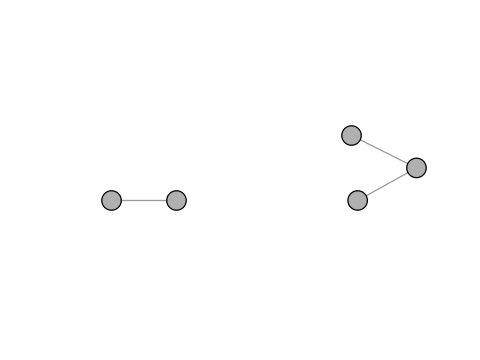

In [145]:
par(mfrow=c(1,2))

## shrink plot size
options(repr.plot.width = 4, repr.plot.height = 3)

## a dyad
## using lgl layout so that the dyad lays flat
plot(graph_from_literal(A-B), vertex.color = "gray", vertex.label = NA, vertex.size = 60, layout=layout_with_lgl)

## a triad 
plot(graph_from_literal(A-B-C), vertex.color = "gray", vertex.label = NA, vertex.size = 60, layout=layout_nicely)

You'll see that we're using a funny little function to draw these networks above called `graph_from_literal`. This lets me literally draw some basic networks using a rudimentary simple syntax. What I want to draw attention to is the name of the function, namely the first word: **graph**. A **graph** is another name for a network and is a term much more common on computer science. A **subgraph** is any subset of a graph. In the network below, the nodes B, C, and D (highlighted in gold) form a subgraph of the larger graph.

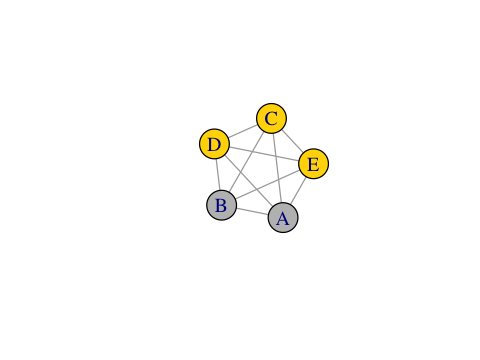

In [99]:
net <- graph_from_literal(A:B:C:D:E - A:B:C:D:E)
V(net)$color <- c('gray', 'gray', 'gold', 'gold', 'gold')
plot(net, vertex.size = 60)

A **component** is a subgraph which is connected together. In the plot below, nodes A through E are a component. Nodes G-H, I-J, K-L-M, and N are components. The largest component is called the **major component** while the others are called **minor components**. N is a special kind of component which is by itself and thus called an **isolate**.

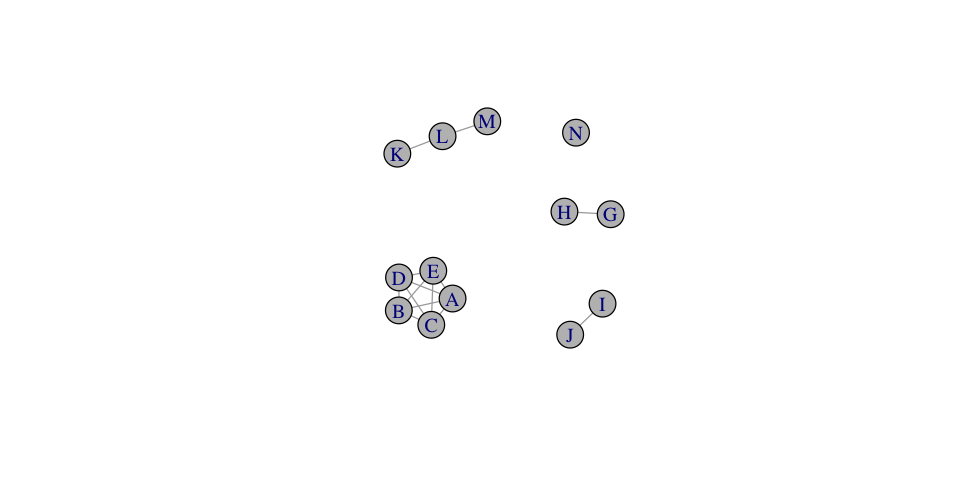

In [148]:
options(repr.plot.width = 8, repr.plot.height = 4)
net <- graph_from_literal(A:B:C:D:E - A:B:C:D:E, G-H, I-J, K-L-M, N)
plot(net, vertex.color = 'gray', vertex.size = 25)

### Types of networks

The edges of a network tend to have a set of common properties. Let's begin with properties of edges. As noted in the Medici example, edges in a network can be either **directed** or **undirected**. The most readily available example we can draw on is from social media -- on Facebook, your friendships are mutual. This is an undirected network. Aliya is friends with Brianna and vice versa. On Twitter, however, follower networks are asymmetrical. Aliya may follow Brianna, but Brianna doesn't follow Aliya. This is a directed network. Directed networks are denoted with an arrow in a visualization.

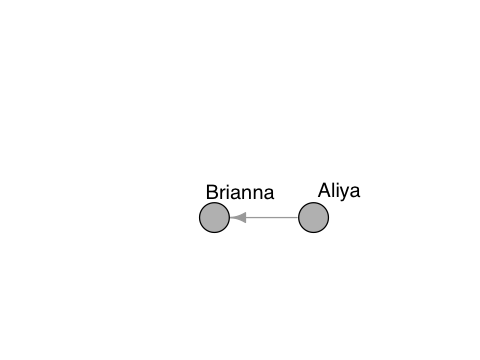

In [151]:
## shrink plot size
options(repr.plot.width = 4, repr.plot.height = 3)

net <- graph_from_literal(Aliya --+ Brianna)
plot(net, 
     vertex.color = "gray", 
     vertex.size = 60, 
     vertex.label.color = "black",
     vertex.label.family = "Helvetica",
     vertex.label.dist = 10,
     edge.arrow.size = 3,
     layout=layout_with_lgl)

Edges can be **weighted** (valued) or **unweighted** (unvalued), which means they can denote some kind of attribute, such as strength or distance. A Facebook friend in which there's a lot of interaction a good deal of interaction may have a higher weight than one without. Visually, this can be represented in a number of ways. Below, it's denoted with edge width. We'll get into that more in the next module.

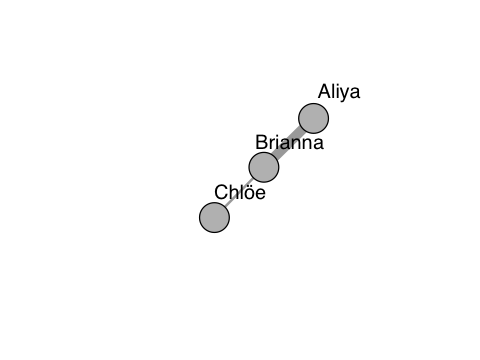

In [152]:
net <- graph_from_literal(Aliya - Brianna - Chlöe)
E(net)$width <- c(8, 2)
plot(net, 
     vertex.color = "gray", 
     vertex.size = 60, 
     vertex.label.color = "black",
     vertex.label.family = "Helvetica",
     vertex.label.dist = 10)

Networks can also be **multiplex**, meaning they can denote multiple relationships. Again, this was the case with the Medici example. Furthermore, nodes can link to themselves, what is called a **self-loop**. Think about retweets -- people on Twitter can retweet others as well as retweeting themselves. In the graph below, imagine that retweets are the gray network and @replies are dark red network. Aliya is retweeting and replying to Brianna and Chlöe. Aliya also retweets herself. Brianna retweets Chlöe.

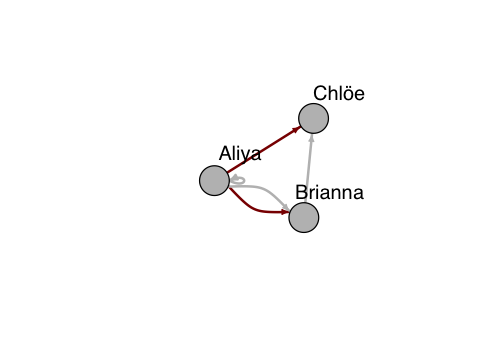

In [164]:
net <- graph_from_literal(Aliya -+ Brianna -+ Chlöe, 
                          Aliya -+ Brianna, Aliya -+ Chlöe,  
                          Aliya-+Aliya, simplify = FALSE)
plot(net, 
     edge.color = c("dark red", "grey", "grey", "dark red", "grey"),
     vertex.color = "gray", 
     vertex.size = 60,
     edge.width = 2,
     edge.arrow.size = 1.5,
     vertex.label.color = "black",
     vertex.label.family = "Helvetica",
     vertex.label.dist = 10)

Lastly, networks can change over time. They can be either **static** or **dynamic**. We won't really touch on these much in this workshop, so we'll avoid the plotting.

#### Two-mode networks and the Breiger duality

So far we've only discussed networks in which there's a node of a particular type. However, in political and social networks we often observe networks of more than one type of entity. The simplest advancement of this is the **two-mode network** or **bipartite network**, that is, a network where there's two types of nodes. 

Two-mode network analysis is most common in the case of individuals and groups, or individuals and events. Take this example from Kieran Healy and [using metadata to identify Paul Revere](https://kieranhealy.org/blog/archives/2013/06/09/using-metadata-to-find-paul-revere). The data here is a matrix which has on its rows individuals and on its columns whether or not the person was a member of a particular American revolutionary organization.

In [107]:
## loading the data
data.revere <- read.csv("data/PaulRevereAppD.csv", row.names = 1)

## show the first six rows
head(data.revere)

,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
Adams.John,0,0,1,1,0,0,0
Adams.Samuel,0,0,1,1,0,1,1
Allen.Dr,0,0,1,0,0,0,0
Appleton.Nathaniel,0,0,1,0,0,1,0
Ash.Gilbert,1,0,0,0,0,0,0
Austin.Benjamin,0,0,0,0,0,0,1


The visualization of bipartite graph can be helpful in illustrating common membership in organizations. 

In [166]:
## resetting to be larger
options(repr.plot.width = 10, repr.plot.height = 10)

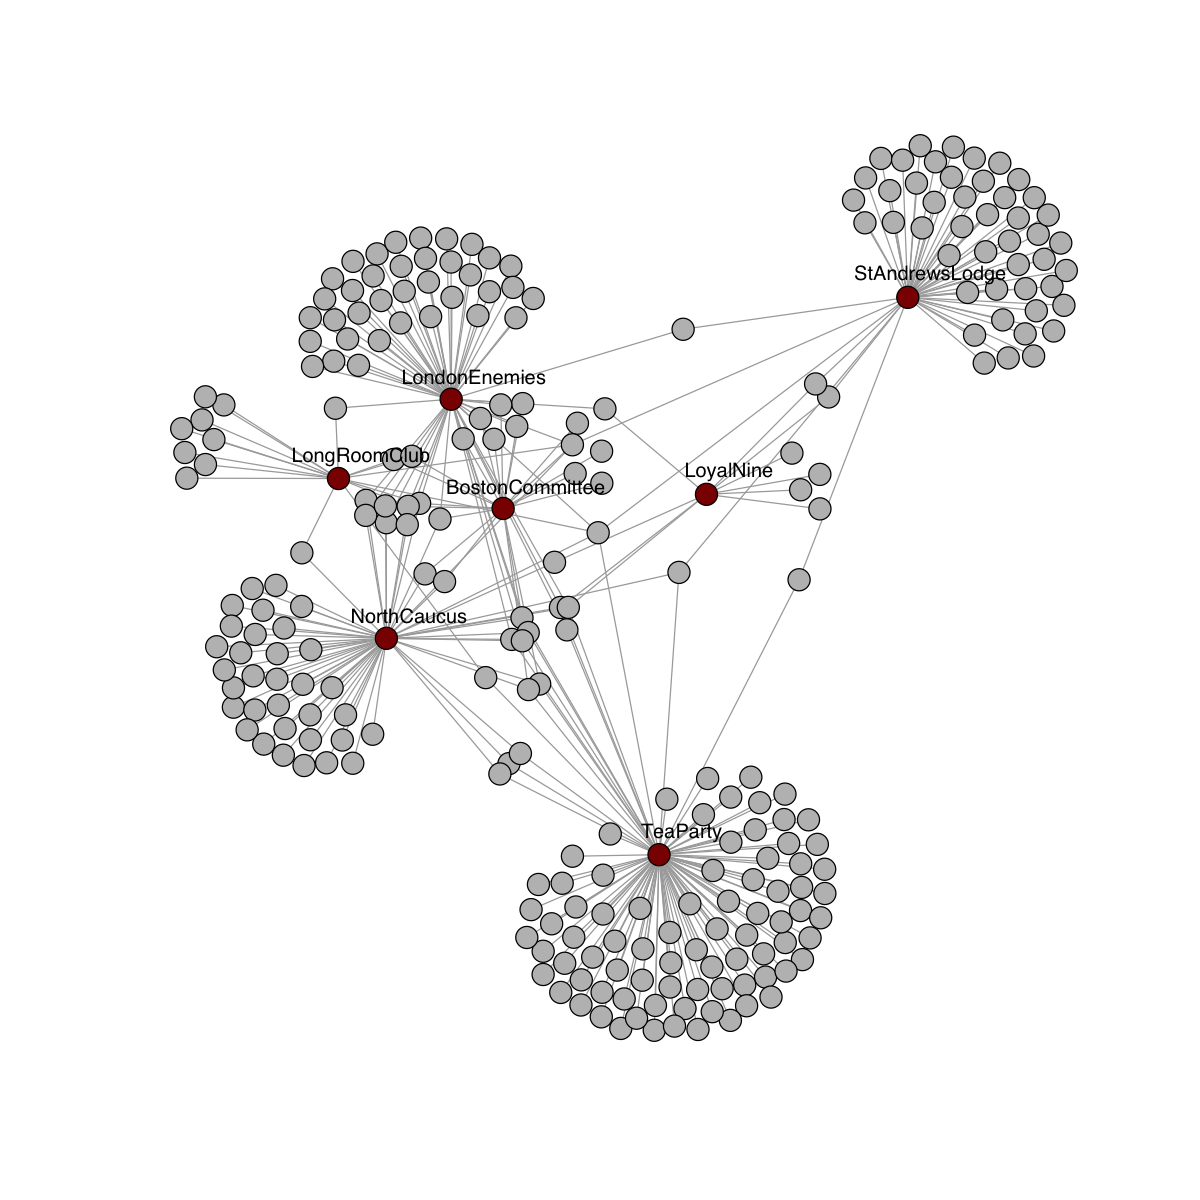

In [165]:
bipartite.revere <- graph.incidence(data.revere)
plot(bipartite.revere, 
     vertex.color = ifelse(V(bipartite.revere)$type, "dark red", "gray"),
     vertex.size = 5,
     vertex.label = ifelse(V(bipartite.revere)$type, V(bipartite.revere)$name, NA),
     vertex.label.dist = 1,
     vertex.label.family = "Helvetica",
     vertex.label.color = "black")

However, a major insight of these types of networks highlighted by [Ron Breiger](https://www.jstor.org/stable/2576011) is the two-mode networks have a duality -- they can be transformed into one-mode networks (e.g. networks with only one type of node) such that we can highlight the importance of one mode in terms of the other, or vice versa. In terms of the Paul Revere dataset, we can see the importance of the individuals based on their group memberships, or we can see the importance of the groups based on the individual memberships.

The transformation is more or less this: if we have an matrix like the dataset above, if we want to obtain the one-mode network of the first mode, we multiple the matrix with its transpose:

$$ G_1 = A (A^T) $$

Conversely, to obtain the one-mode network of the second mode, we multiple the transpose of the matrix with the matrix:

$$ G_2 = (A^T) A $$

In [109]:
data.revere <- as.matrix(data.revere) ## only matrices can be transposed

person.net <- data.revere %*% t(data.revere)
diag(person.net) <- NA
revere.person.g <- graph.adjacency(person.net,mode="undirected", weighted=NULL, diag=FALSE)

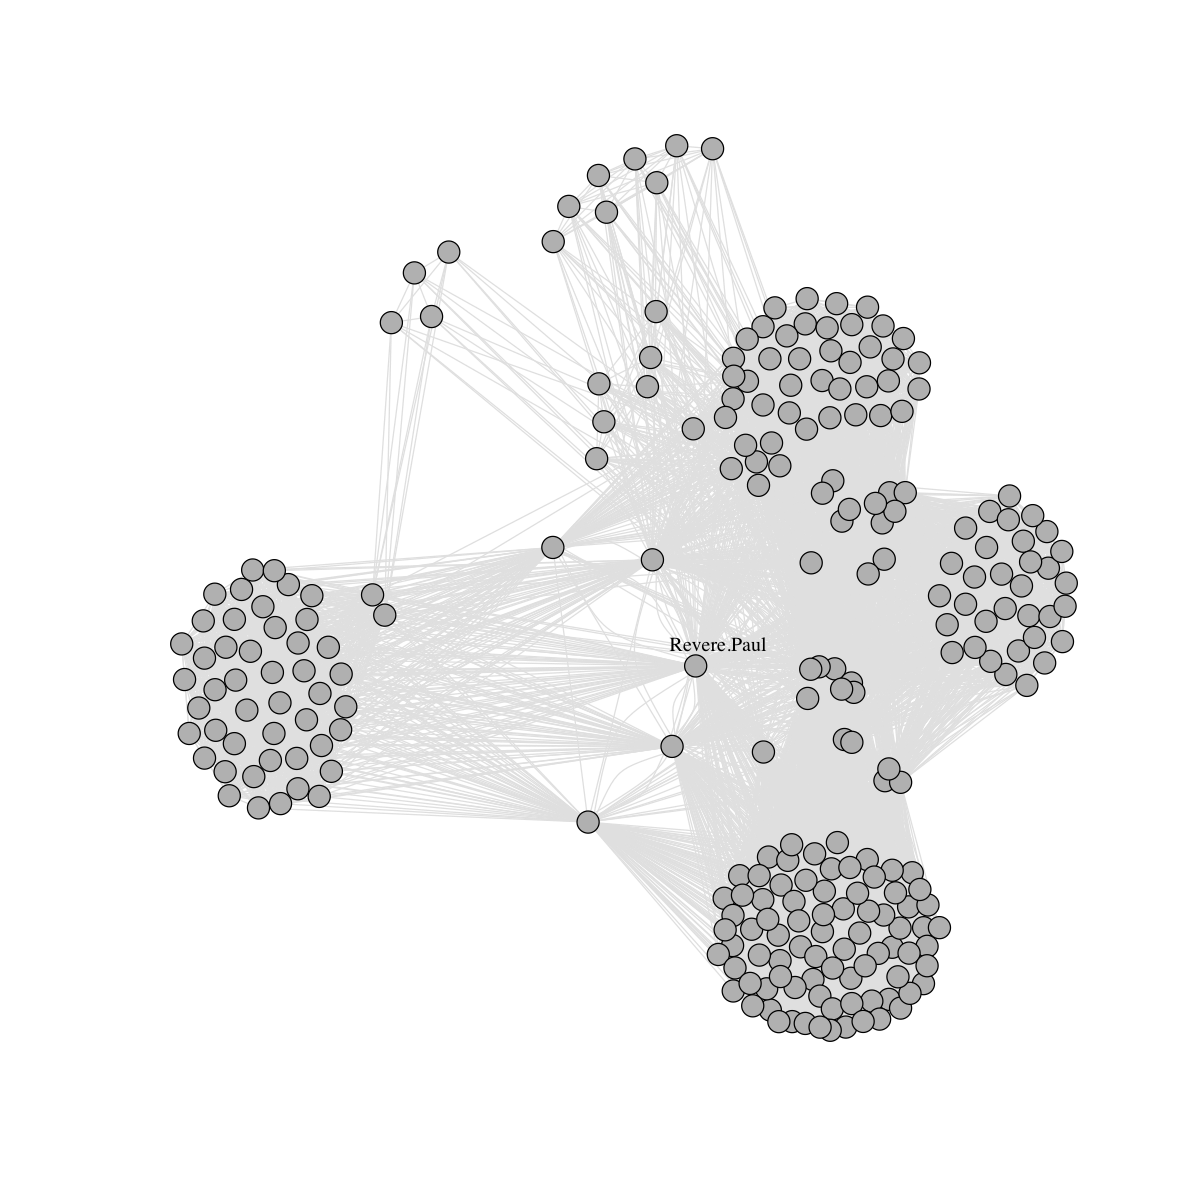

In [112]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot(revere.person.g,
     vertex.color = "grey",
     vertex.size = 5,
     vertex.label = ifelse(V(revere.person.g)$name == "Revere.Paul", V(revere.person.g)$name, ""),
     vertex.label.dist = 1,
     edge.color = "grey90",
     vertex.label.color = "black")

Paul Revere himself is highlighted to illustrate his importance to the connectivity of this network. While we lose some information in terms of group membership, we gain a good deal in highlighting the importance of relationships in the mode we may be more interested in.

### Exercise 2

1. If you haven't already, install the `igraph` package with `install.packages('igraph')`. Then load it with `library(igraph)`.
2. The syntax for creating undirected graphs with `graph_from_literal` is `A - B`. Create an undirected graph in which Zurich is connected to Geneva and Bern, and Geneva is connected to Bern.
3. Generate and plot the one-mode network for the groups by filling out the blanks below. What do you notice?

In [ ]:
## 3
revere.group.net <- ____ %*% ____
diag(revere.group.net) <- NA
revere.group.g <- graph.adjacency(____, mode="undirected", weighted=NULL, diag=FALSE)

plot(revere.group.g,
     vertex.color = "grey",
     vertex.size = 5,
     vertex.label.dist = 1,
     edge.color = "grey",
     vertex.label.color = "black")

<dd>4. `simplify` is a function we often use to clean up network. It takes one argument, the network itself. Run `simplify` below and fill in the blanks for plotting. What's different?</dd>

In [ ]:
## 4
simplify(____)
plot(____,
     vertex.color = "grey",
     vertex.size = 5,
     vertex.label.dist = 1,
     edge.color = "grey",
     vertex.label.color = "black")

### Data sources and data formats

We turn our attention to the various methods of gathering network data. Our minds may go automatically to web scraping or various APIs for network data. But there are many different methods of gathering network data. The first is **digital** -- accessing network data through web scraping (such as Adamic and Glance's hyperlink network), the Facebook Graph API (which has graph in the name), and the Twitter API. These data appear to be "born networked" -- it doesn't take much of a stretch of the imagination to ask how they are relational. However, one should definitely ask what the nature of that network relation is. [boyd, Golder, and Lotan](https://ieeexplore.ieee.org/document/5428313/), for instance, ask about the different conversational aspects of retweets and what that relationship means to different people.

The next most popular which we tend to see is **survey-based**, which ask about networks of individuals with whom individuals correspond or interact. Much of the research in the past 40 years on networks has been based on surveys which ask about [core discussion networks](https://scholar.harvard.edu/files/mariosmall/files/small_etal_2015.pdf) -- close networks of people with whom we discuss important topics. The General Social Survey in the US has asked about this for years and has been [a subject of contention](https://www.sciencedirect.com/science/article/pii/S0378873311000566).  

Thirdly, network ties can be inferred via qualitative methods, namely, **interviews and ethnographies**. These methods attempt to gather information on social ties by interacting and/or observing people. A study by Matt Desmond discusses "[disposible ties](https://www.jstor.org/stable/10.1086/663574)" -- intensely strong, yet temporary ties amongst the urban poor. Ethnographical methods often discuss these ties in network analysis language without formalizing the relations between individuals.

Lastly, **archival** methods draw networks from historical and archival sources. We have already seen an example about with the Medici network. There are many examples from within historical sociology, including Bearman et al.'s methodological article on [historical casing from first-person narratives](https://www.jstor.org/stable/1171636?seq=1#page_scan_tab_contents) and Mohr and Duquenne's exploration of the [turn-of-the-century language around the deserving and undeserving poor](https://www.jstor.org/stable/657930?seq=1#page_scan_tab_contents).

Before moving on, I want to say a word about **explicit vs. implicit networks**. There are some things which seem to be explicitly referred to as networks in the above methods -- Twitter retweets, survey name generators. However, there's a good deal of data which has an implicit network structure which has to be specified by the researcher. Examples of these include textual networks -- which is an alternative way of performing text analysis -- [hashtag cooccurrence analysis](http://alex-hanna.com/static/pdf/Hanna_etal.ICWSM2011.pdf), and [legislative cosponsorship data](http://jhfowler.ucsd.edu/cosponsorship.htm). While these do not appear to be data sources where you can apply network data, they turn out to be places where thinking about things in a relational manner ends up being very helpful. More on this as we go on.

#### Data formats

There's three main ways that networks are represented and can be loaded into R. There are several other properitary formats which I will not discuss here. These, however, are the main ways which we can read in networks to `igraph` and other R packages.

In [113]:
## incidence matrix
head(data.revere)

,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
Adams.John,0,0,1,1,0,0,0
Adams.Samuel,0,0,1,1,0,1,1
Allen.Dr,0,0,1,0,0,0,0
Appleton.Nathaniel,0,0,1,0,0,1,0
Ash.Gilbert,1,0,0,0,0,0,0
Austin.Benjamin,0,0,0,0,0,0,1


**Incidence matrix** - The incidence matrix makes the most sense as a representation for two-mode networks, since it is matching one class of entities to another. In the Paul Revere example, the people are on the rows and the organizations are on the columns. If the network is unweighted, then for all nodes which have a connection, the corresponding cell is 1. For all other cells, the value is 0. If it network is weighted, then instead of 1, the value is the weight.

In [114]:
## adjacency matrix
revere.person.df <- data.frame(as.matrix(as_adjacency_matrix(revere.person.g)))
head(revere.person.df)

,Adams.John,Adams.Samuel,Allen.Dr,Appleton.Nathaniel,Ash.Gilbert,Austin.Benjamin,Austin.Samuel,Avery.John,Baldwin.Cyrus,Ballard.John,⋯,Whitwell.William,Williams.Jeremiah,Williams.Jonathan,Williams.Thomas,Willis.Nathaniel,Wingfield.William,Winslow.John,Winthrop.John,Wyeth.Joshua,Young.Thomas
Adams.John,0,2,1,1,0,0,0,0,0,1,⋯,0,0,0,0,0,0,1,1,0,1
Adams.Samuel,2,0,1,2,0,1,1,1,1,1,⋯,1,0,1,0,0,0,1,2,0,2
Allen.Dr,1,1,0,1,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,1,0,1
Appleton.Nathaniel,1,2,1,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,1,0,2
Ash.Gilbert,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
Austin.Benjamin,0,1,0,0,0,0,1,1,1,0,⋯,1,0,1,0,0,0,0,1,0,0


**Adjacency matrix** - An adjacency matrix operates on effectively the same principle as the incidence matrix for one-mode networks. The adjacency matrix is symmetric across the diagonal for undirected networks but not for directed networks. The code above converts it to a data frame for ease of presentation.

In [120]:
## edgelist
revere.person.el <- data.frame(as_edgelist(revere.person.g))
head(revere.person.el)

X1,X2
Adams.John,Adams.Samuel
Adams.John,Adams.Samuel
Adams.John,Allen.Dr
Adams.John,Appleton.Nathaniel
Adams.John,Ballard.John
Adams.John,Barber.Nathaniel


**Edgelist** - This is the simplest data format. It is a simple list of edges in the graph. Weights will often be denoted by a third column. Again, the code above converts the edgelist to a data frame for ease of use.

#### Importing data into `igraph`

`igraph` ([documentation](http://igraph.org/r/doc/)) is a robust and fast network package developed by Gabor Csardi. We are going to deal with for the majority of this workshop, although there are a number of supplemental packages which are great for plotting and doing inference. We'll introduce them as needed. The good news is that `igraph` plays nicely with all the other network packages we will be using for this workshop.

`igraph` has a class of method which can create an network object from many different formats. We've already seen one in `graph_from_literal`. We also have the following:

- `graph_from_edge_list`
- `graph_from_adjacency_matrix`
- `graph_from_incidence_matrix`
- `graph_from_data_frame` - creates a graph from an R data frame type

### Exercise 3

1. Consider a data set of tweets with information on retweets and @mentions. How do these relationships differ from each other? How are they the same? Discuss with a partner.
2. Let's load up a new dataset -- the cosponsorship network for Conseil National of the Swiss Parliament, from 1995-1999. This data is part of a [larger database of cosponsorship data](https://github.com/briatte/parlnet) created by Françoise Briatte. This data has been converted from gexf format, and it has been converted from a directed to an undirected graph.

In [ ]:
data.conseil = read.csv('data/net_ch_cn1995-1999.csv', header = TRUE, as.is = TRUE)

Use `head` to answer the question -- what kind of data source is this? What kind of data format is this?
<dd>3. Complete the following code to create the network which is appropriate to this data format.</dd>

In [ ]:
conseil.net <- ____(as.matrix(data.conseil), directed = FALSE)